<a href="https://colab.research.google.com/github/Nastya880/documentation-for-dissertation/blob/main/RF_v2_2_prod_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Случайный лес. Модель - классификатор.**

# Классификатор "Random Forest"

In [ ]:
#@title Импорт библиотек
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

## Объяснение всех шагов для обучения модели - классификатора

In [ ]:
#загрузка датасета с интернета
dataset = pd.read_csv("https://raw.githubusercontent.com/ShauryaBhandari/Machine-Learning/master/Random%20Forest/bill_authentication.csv")

# с локального хранилища: bill_authentication.csv
# from google.colab import files
# uploaded = files.upload()
# filename=list(uploaded.keys())[0]
# dataset=pd.read_csv(filename)

print(dataset.head())

   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


 **Загрузим**:

*      в перменную `X` данные, по которым будет происходить классификация 

*      в переменную `y` - фичи, которые будем предсказывать






In [ ]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

Разделим наши данные на обучающую и тестируемую выборки:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

1.   Создадим лес из 50 деревьев и установим единый ГСЧ. 
2.   Обучим модель и протестируем её.

In [ ]:
global_n_estimators=50

classifier = RandomForestClassifier(n_estimators=global_n_estimators, random_state=0,max_depth=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Обзор эффективности созданной модели:

In [ ]:
accuracy_rf_clf=round(accuracy_score(y_pred, y_test),3)*100
print('Точность предсказываний = {0} или {1}%'.format(accuracy_score(y_pred, y_test),accuracy_rf_clf))

Точность предсказываний = 0.9781818181818182 или 97.8%


In [ ]:
#@title Пакеты для визуализации дерева
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call

from matplotlib import rcParams
import seaborn as sb

rcParams['figure.figsize'] = 25,18

Мы видим, как одно из деревьев решений из нашего леса классифицирует различные данные.


*   Последовательное разделение идёт по фиче, снижающей неопределенность максимальным образом 
*   Неопределённость тем больше, чем `gini` ближе к единице.
При gini=0 - мы одноначно может предсказать исследуемую переменную


[Text(0.6684782608695652, 0.9166666666666666, 'Skewness <= 5.235\ngini = 0.489\nsamples = 697\nvalue = [630, 467]\nclass = C'),
 Text(0.42391304347826086, 0.75, 'Entropy <= -0.727\ngini = 0.479\nsamples = 465\nvalue = [287, 437]\nclass = l'),
 Text(0.21739130434782608, 0.5833333333333334, 'Variance <= 0.301\ngini = 0.185\nsamples = 147\nvalue = [23, 200]\nclass = l'),
 Text(0.13043478260869565, 0.4166666666666667, 'Skewness <= -2.241\ngini = 0.011\nsamples = 117\nvalue = [1, 177]\nclass = l'),
 Text(0.08695652173913043, 0.25, 'Variance <= -1.095\ngini = 0.04\nsamples = 31\nvalue = [1, 48]\nclass = l'),
 Text(0.043478260869565216, 0.08333333333333333, 'gini = 0.0\nsamples = 30\nvalue = [0, 48]\nclass = l'),
 Text(0.13043478260869565, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = C'),
 Text(0.17391304347826086, 0.25, 'gini = 0.0\nsamples = 86\nvalue = [0, 129]\nclass = l'),
 Text(0.30434782608695654, 0.4166666666666667, 'Curtosis <= -2.914\ngini = 0.5\nsamples = 

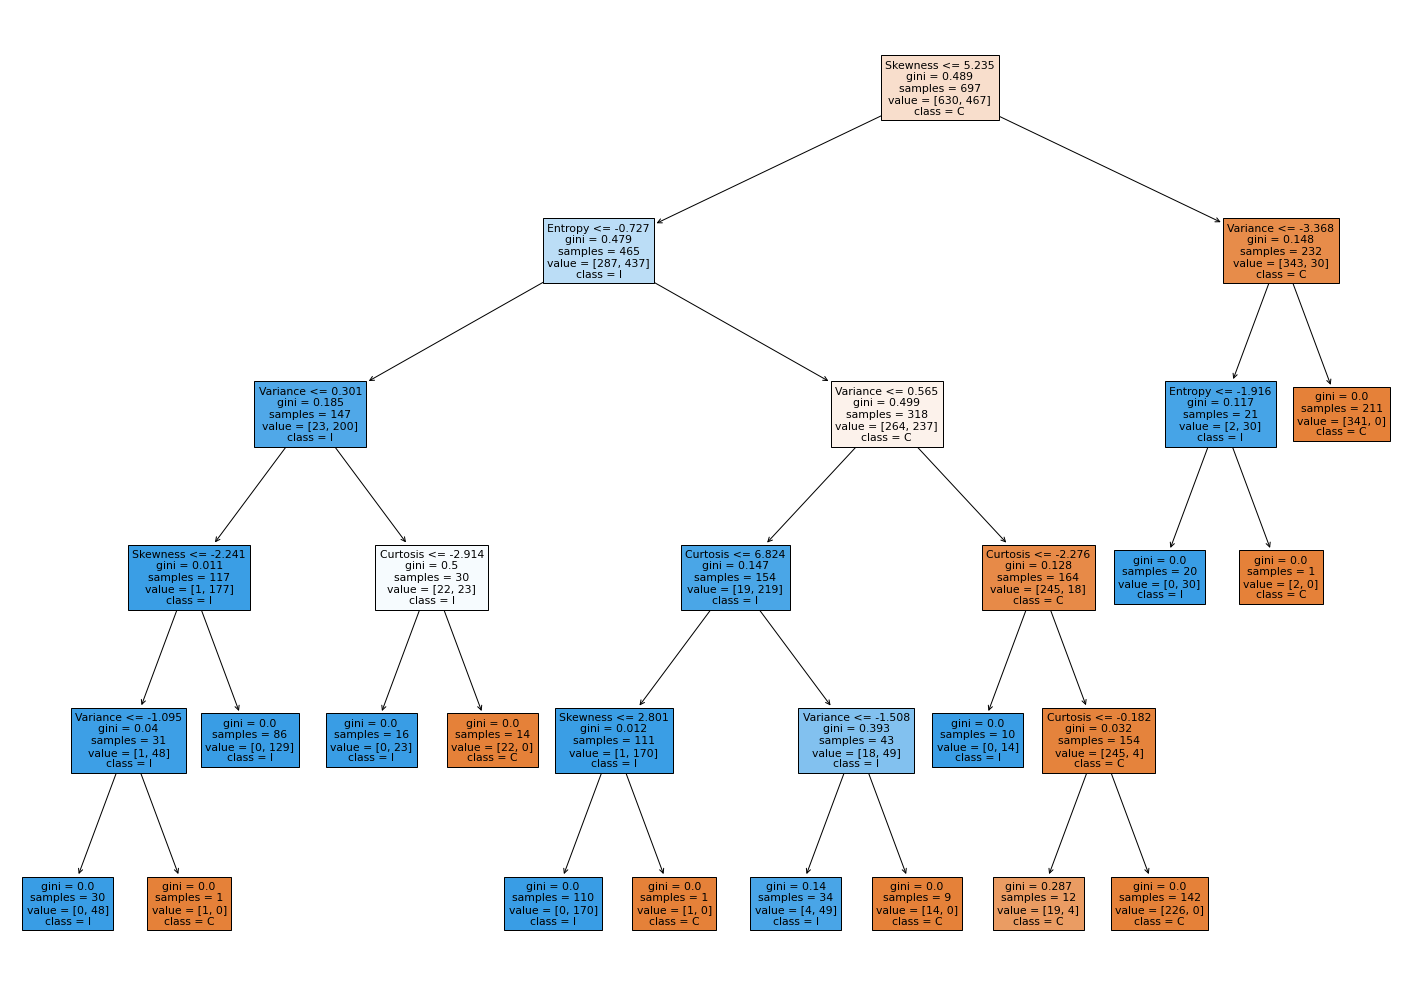

In [ ]:
estimator = classifier.estimators_[5]
tree.plot_tree(estimator, filled=True,precision=3, feature_names=list(dataset.columns)[:-1] ,class_names=list(dataset.columns)[-1])

Визуализируем важность фич (переменных):

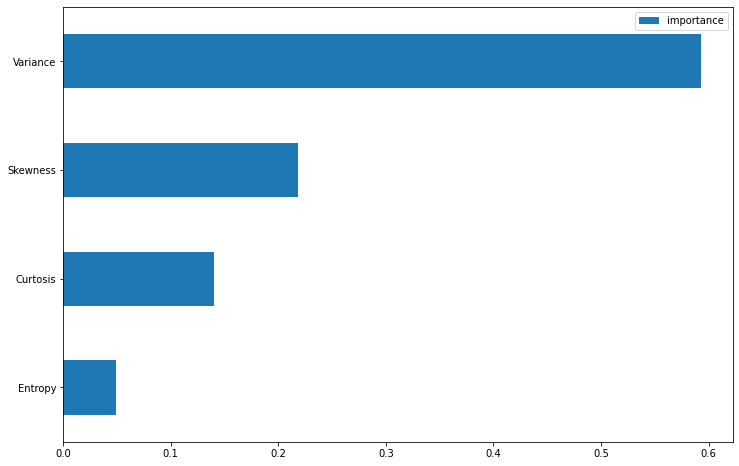

In [ ]:
imp = pd.DataFrame(classifier.feature_importances_, index=list(dataset.columns)[:-1], columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Мы видим, что эффективность обученной модели методом случайного леса равняется практически 99%

## Создадим функцию, возвращающую новую модель, обученную методом случайного леса

Параметры:


*   `df` - таблица с данными для обучения модели
*   `name_pred` - название столбца, который мы хотим предсказывать
*   `n_est` - количество деревьев в ансамбле

Возврат:



*   Обученный классификатор
* массив` из 2х значений:  реальная классификация, предсказанная





In [ ]:
## Функция для создания нового классификатора
def random_tree_clfr(dataset:pd.DataFrame, name_pred, n_est:int):

  X = dataset.drop(name_pred, 1)
  y = dataset[name_pred]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

  classifier = RandomForestClassifier(n_estimators=n_est, random_state=0)
  classifier.fit(X_train, y_train)
  
  y_pred = classifier.predict(X_test)

  return classifier,[y_test,y_pred]

## Протестируем нашу функцию обучения для модели




Подготовим новые данные для создания модели


In [ ]:
from sklearn import datasets

#Загрузка датасета
iris = datasets.load_iris()
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
print(data.head())
print(data.dtypes)


   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
species           int64
dtype: object


Проверим функцию построения модели и посмотрим на её эффективность 

In [ ]:
classifer,y_test_pred = random_tree_clfr(data,'species',global_n_estimators)
accuracy_rf_clf=float(np.sum(y_test_pred[1]==y_test_pred[0]))/y_test_pred[0].shape[0]
print('accuracy: %f'%(accuracy_rf_clf))

accuracy: 0.966667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


Визуализация нашей модели:

[Text(0.5, 0.9166666666666666, 'petal width <= 0.75\ngini = 0.66\nsamples = 75\nvalue = [48, 37, 35]\nclass = s'),
 Text(0.4, 0.75, 'gini = 0.0\nsamples = 29\nvalue = [48, 0, 0]\nclass = s'),
 Text(0.6, 0.75, 'petal width <= 1.75\ngini = 0.5\nsamples = 46\nvalue = [0, 37, 35]\nclass = p'),
 Text(0.4, 0.5833333333333334, 'sepal length <= 7.1\ngini = 0.142\nsamples = 26\nvalue = [0, 36, 3]\nclass = p'),
 Text(0.3, 0.4166666666666667, 'sepal width <= 2.25\ngini = 0.1\nsamples = 25\nvalue = [0, 36, 2]\nclass = p'),
 Text(0.2, 0.25, 'sepal length <= 6.1\ngini = 0.5\nsamples = 2\nvalue = [0, 2, 2]\nclass = p'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 2]\nclass = e'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 2, 0]\nclass = p'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 23\nvalue = [0, 34, 0]\nclass = p'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = e'),
 Text(0.8, 0.5833333333333334, 'petal len

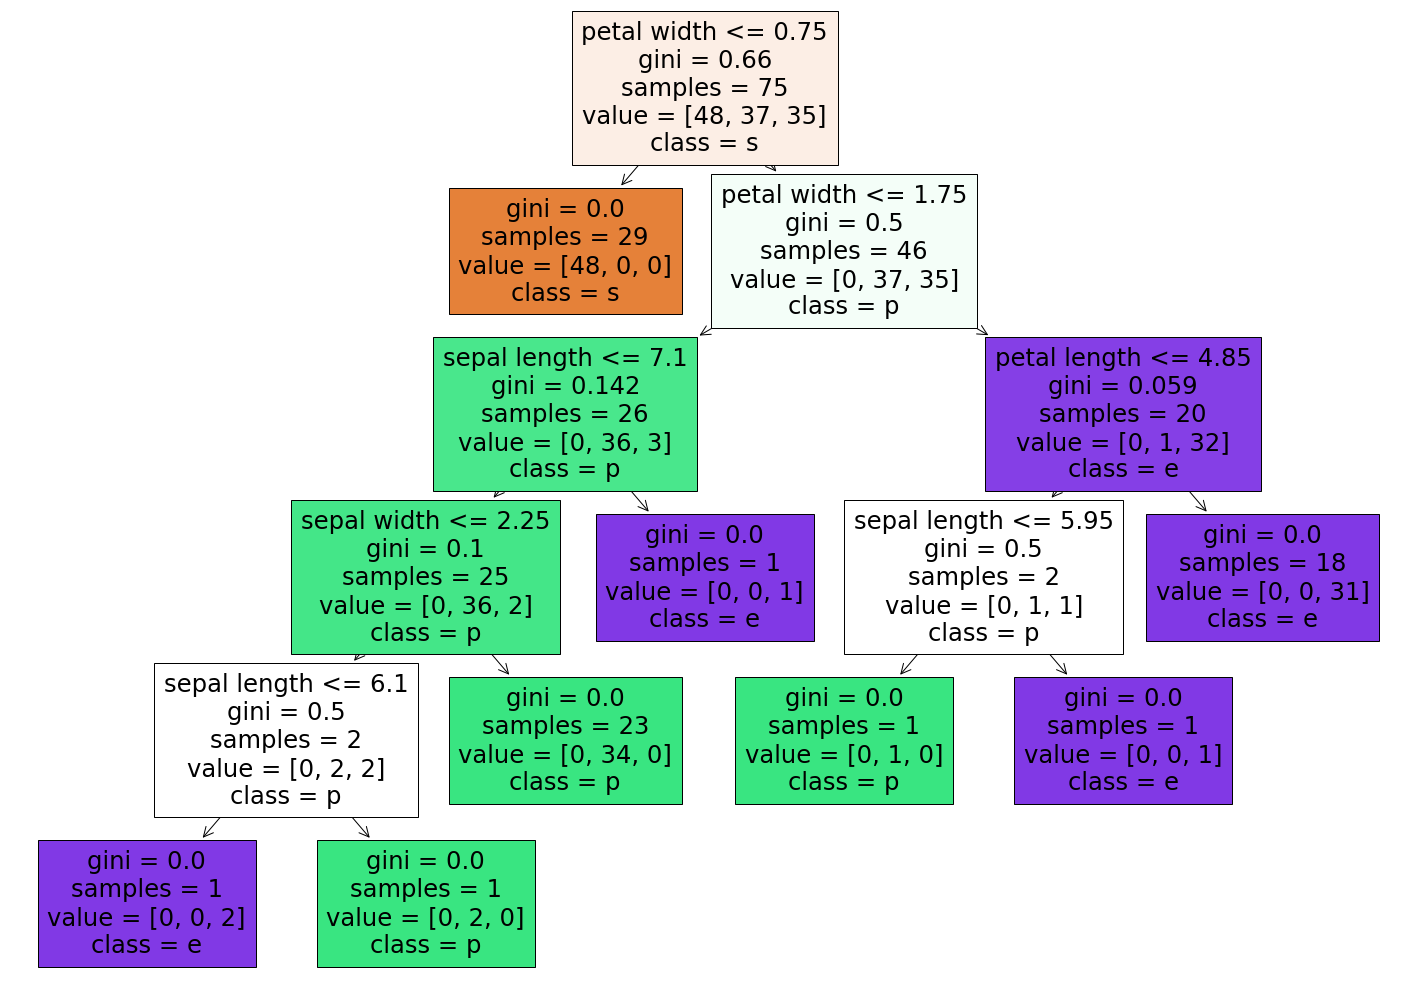

In [ ]:
 # Извлечём дерево решений
estimator = classifer.estimators_[5]
tree.plot_tree(estimator, filled=True,precision=3, feature_names=list(data.columns)[:-1] ,class_names=list(data.columns)[-1])


*   Последовательное разделение идёт по фиче, снижающей неопределенность максимальным образом 
*   Неопределённость тем больше, чем 'gini' ближе к единице.
При gini=0 - мы одноначно может предсказать исследуемую переменную



Важность фич:

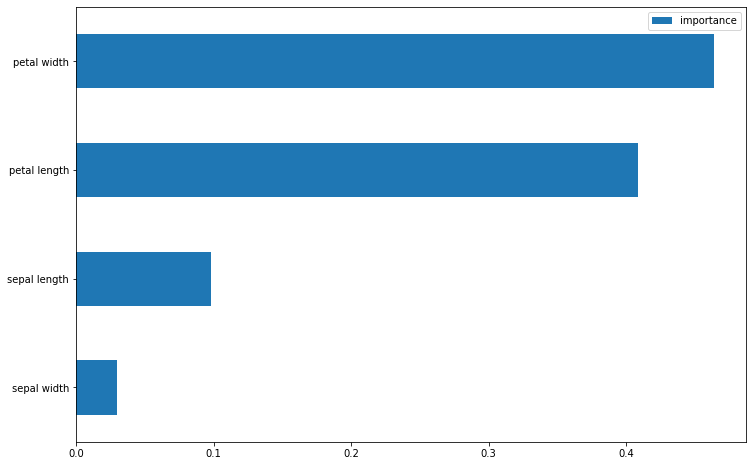

In [ ]:
imp = pd.DataFrame(classifer.feature_importances_, index=list(data.columns)[:-1], columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

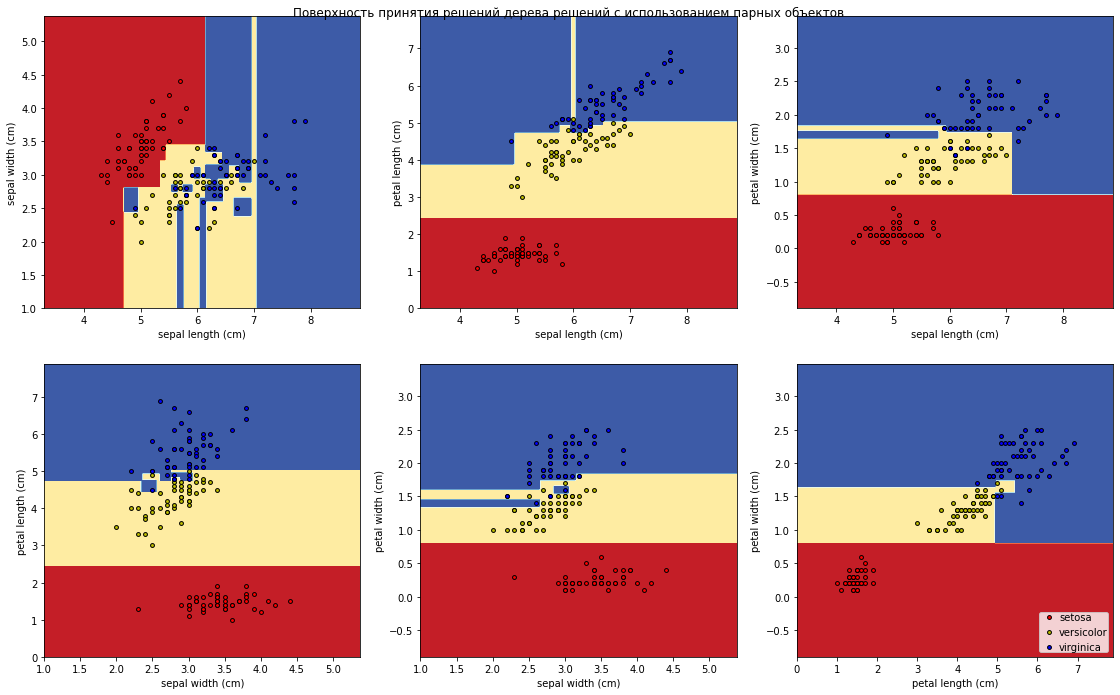

In [ ]:
#@title Визуальное представление классификаторов (не леса - обычных деревьев 
#в пространстве 2х фич) на основе классического датасета видов "ириса Фишера"
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()
plt.figure(figsize=(16, 10)) 

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # Мы берем только две соответствующие фИЧИ
    X = iris.data[:, pair]
    y = iris.target

    # обучение
    clf = DecisionTreeClassifier().fit(X, y)

    # Построим границу принятия решений
    plt.subplot(2, 3, pairidx + 1,)
    plt.subplots_adjust(wspace=5, hspace=5)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.4, w_pad=0.4, pad=2.4)
    plt.subplots_adjust(wspace=0.19, hspace=0.19)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Нанесём на график тренировочные точки
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
        

plt.suptitle("Поверхность принятия решений дерева решений с использованием парных объектов")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)


***Еще один ансамблевый метод, работающий на деревья решений методом экстримального градиентного бустинга. ***

# Классификатор XGBoost

## Чем отличается Случайный лес от экстримального градиентного бустинга?

- Случайный лес: Этот алгоритм основан на бэггинге. Отличается он тем, что выбирает случайные признаки. То есть, каждый специалист по подбору персонала может проверить знания кандидата лишь в какой-то одной случайно выбранной области.
 
- Градиентный бустинг: Частный случай бустинга, в котором ошибка минимизируется алгоритмом градиентного спуска. То есть, наименее квалифицированные кандидаты отсеиваются как можно раньше.

- XGBoost: Считайте его градиентным бустингом на стероидах (не зря, ведь он называется экстремальным градиентным бустингом). Это идеальная комбинация оптимизации ПО и железа для получения точных результатов за короткое время с минимальным использованием вычислительных ресурсов.

## Сравнение производительности:

  Был использован датасет Scikit-learn “Make_Classification” для того, чтобы создать миллион точек с 20 признаками (из них 2 информативных и 2 излишних). Мы протестировали несколько алгоритмов: логистическая регрессия, случайный лес, стандартный градиентный бустинг и XGBoost.
  
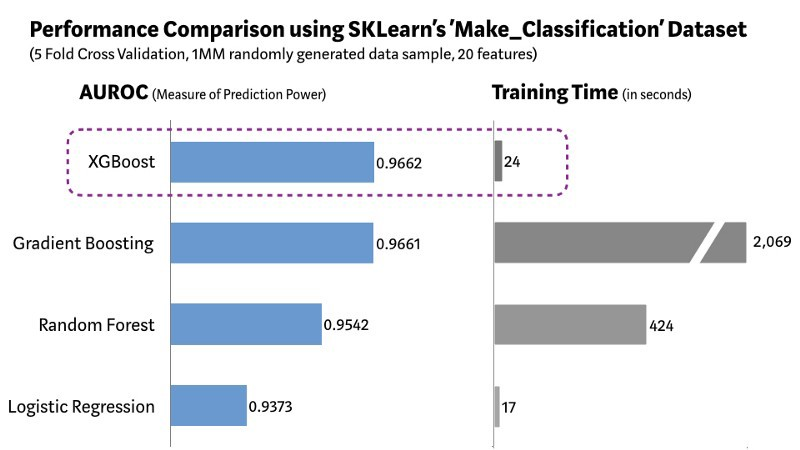

Наконец, испробуем эту мощь!

## Создание и тестирование нового ансамбля

In [ ]:
import xgboost as xgb

Подготовим и разделим данные

In [ ]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Создадим классификатор и обучим.

Для чистоты эксперимента было бы неплохо задать XDBoost те же параметры, что и Random Forest. 

Так давайте так и сделаем! Из-за того, что эти модели устроены на одном приципе, а именно - множество деревьер решений, мы зададим Абсолютно те же параметры, что создавали в случайном лесе. 

In [ ]:
xg_cl=xgb.XGBClassifier(objective='binary:logistic',n_estimators=global_n_estimators,seed=1,max_depth=5)
xg_cl.fit(X_train,y_train)
pred=xg_cl.predict(X_test)

Выведем его точность

In [ ]:
accuracy_xgb_clf=float(np.sum(pred==y_test))/y_test.shape[0]
print('accuracy: %f'%(accuracy_xgb_clf))

accuracy: 0.981818


# Случайный лес - регрессионная модель

Непосредственно обучение модели состоит всего из 2х строчек, что не скажем о подготовке данных. 


---


В силу того, что подготовка данных практически совпадает для обучения разных моделей - выделим это в отдельную функцию
(На самом деле препроцессинг данных намного сложнее и зачастую состоит из сотен строк, но мы подобрали уже готовые для обучения данные, т.к. наша цель состоит в *демонстрации возможностей случайного леса*)

In [ ]:
# с локального хранилища: petrol_consumption.csv
# from google.colab import files
# uploaded = files.upload()
# filename=list(uploaded.keys())[0]
# dataset=pd.read_csv(filename)

#с интернета
dataset = pd.read_csv('https://raw.githubusercontent.com/ShauryaBhandari/Machine-Learning/master/Random%20Forest/petrol_consumption.csv')


In [ ]:
name_pred='Petrol_Consumption'
X = dataset.drop(name_pred, 1)
y = dataset[name_pred]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


Создадим регрессор и обучим его

In [ ]:
regressor = RandomForestRegressor(n_estimators=global_n_estimators, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [ ]:
#предсказание для вычисления ошибки
rf_reg_y_pred = regressor.predict(X_test)

print('Средняя абсолютная ошибка регрессии:', metrics.mean_absolute_error(y_test, rf_reg_y_pred))
print('Среднеквадратичная ошибка регрессии:', metrics.mean_squared_error(y_test, rf_reg_y_pred))
print('Корневая средняя ошибка регрессии:', np.sqrt(metrics.mean_squared_error(y_test, rf_reg_y_pred)))

Средняя абсолютная ошибка регрессии: 49.45600000000002
Среднеквадратичная ошибка регрессии: 3773.84936
Корневая средняя ошибка регрессии: 61.431664148059674


**Визуализируем**
(закрашенная область - средняя абсолютная ошибка)

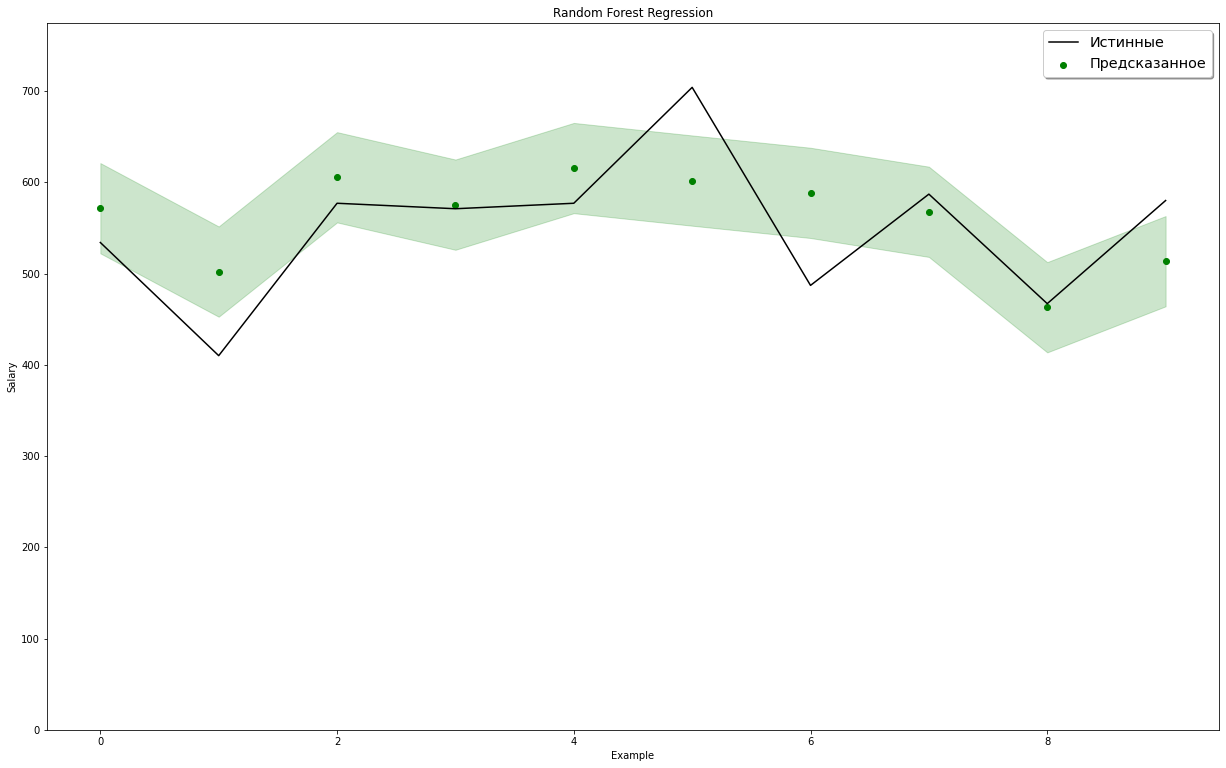

In [ ]:
#@title Визуализируем на тестовой выборке. 
# Визуализация результатов регрессии случайных лесов
X_grid = np.arange(0, y_test.size, 1)
pred=regressor.predict(X_test)

plt.figure(figsize=[21,13])

# график для исходных данных
plt.plot(X_grid, y_test, color = 'black',label='Истинные')  

# прогнозируемые данные
plt.scatter(X_grid, pred, 
         color = 'green',label='Предсказанное') 

plt.title('Random Forest Regression')
plt.xlabel('Example')
plt.ylabel('Salary')
plt.ylim([0,y_test.max()*1.1])

mstd=metrics.mean_absolute_error(y_test,  pred)
plt.fill_between(X_grid, pred -  mstd, pred +  mstd, color="green", alpha=0.2);

legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

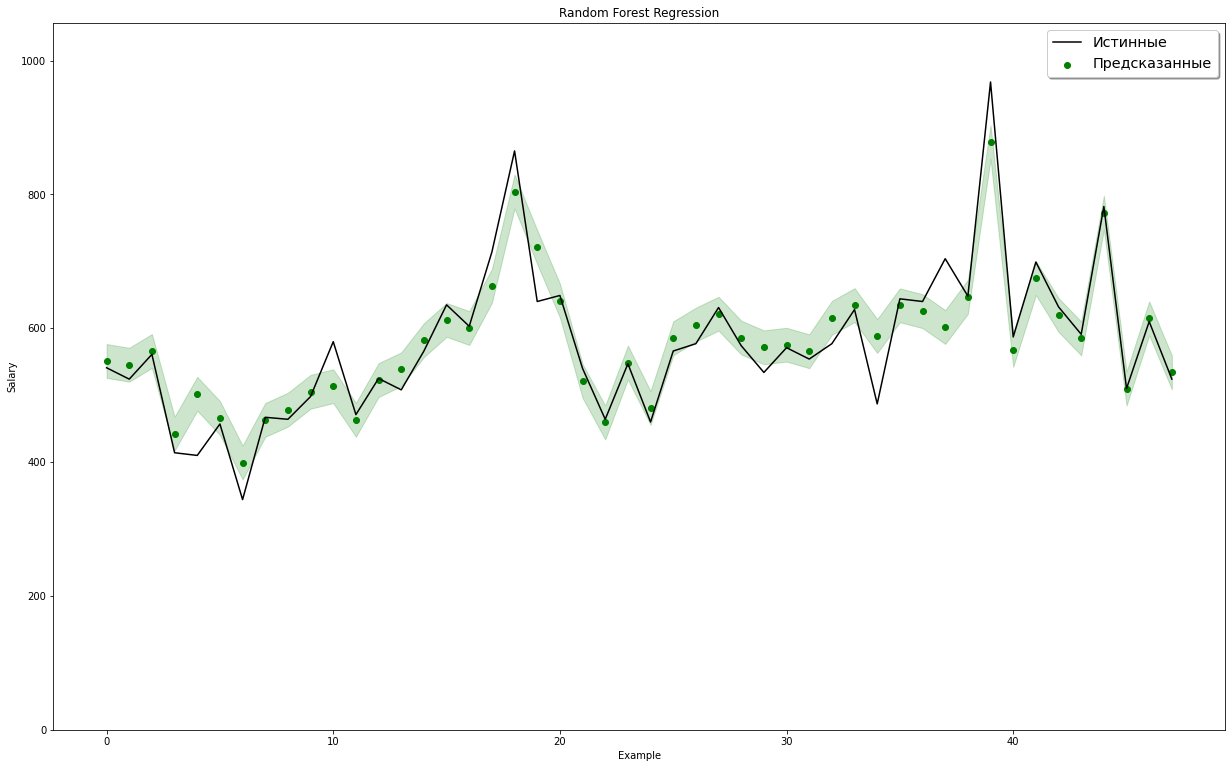

In [ ]:
#@title Визуализируем на всей выборке 

X_grid = np.arange(0, y.size, 1)
pred=regressor.predict(X)

plt.figure(figsize=[21,13])

plt.plot(X_grid, y, color = 'black',label='Истинные')  

# график прогнозируемых данных
plt.scatter(X_grid, pred, 
         color = 'green',label='Предсказанные') 

plt.title('Random Forest Regression')
plt.xlabel('Example')
plt.ylabel('Salary')
plt.ylim([0,y_test.max()*1.5])

mstd=metrics.mean_absolute_error(y,  pred)
plt.fill_between(X_grid, regressor.predict(X) - mstd, regressor.predict(X) + mstd, color="green", alpha=0.2);


legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')


plt.show()

## Визуализация важности фич для предсказаний по дереву решений

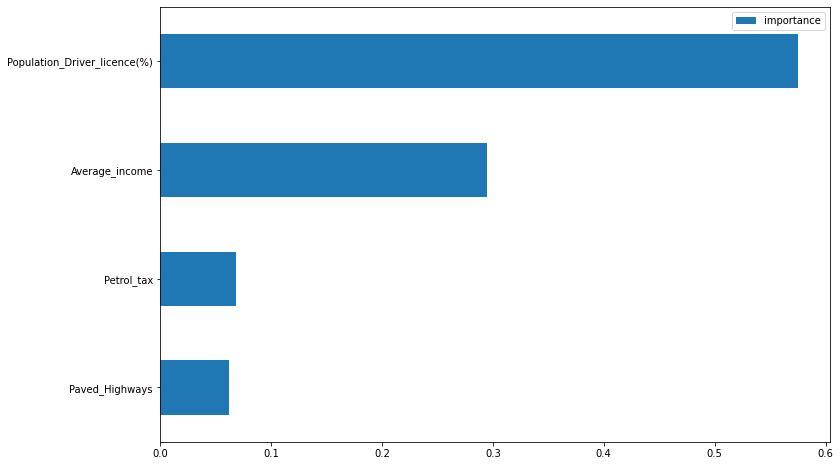

In [ ]:
imp = pd.DataFrame(regressor.feature_importances_, index=list(dataset.columns)[:-1], columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

# XGBoost - регрессионная модель

In [ ]:
X = dataset.drop(name_pred, 1)
y = dataset[name_pred]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
xg_reg=xgb.XGBRegressor(n_estimators=global_n_estimators,seed=0)
xg_reg.fit(X_train,y_train)

[15:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=50, seed=0)

In [ ]:
#Вычислим ошибку
xgb_reg_y_pred=xg_reg.predict(X_test)

print('Средняя абсолютная ошибка регрессии:', metrics.mean_absolute_error(y_test, xgb_reg_y_pred))
print('Среднеквадратичная ошибка регрессии:', metrics.mean_squared_error(y_test, xgb_reg_y_pred))

Средняя абсолютная ошибка регрессии: 48.32734985351563
Среднеквадратичная ошибка регрессии: 3937.1404617087915


# Итоги

In [ ]:
print(f'Точность классификатора RandomForest при n_est = 50, seed = 0:\t{round(accuracy_rf_clf,5)}')
print(f'Точность классификатора XGBoost при n_est = 50, seed = 0:\t{round(accuracy_xgb_clf,5)}')
print('___'*7)
print('Средняя абсолютная ошибка регрессии RF:', metrics.mean_absolute_error(y_test, rf_reg_y_pred))
print('Среднеквадратичная ошибка регрессии RF:', metrics.mean_squared_error(y_test, rf_reg_y_pred))
print('___'*3)
print('Средняя абсолютная ошибка регрессии: XGBoost', metrics.mean_absolute_error(y_test, xgb_reg_y_pred))
print('Среднеквадратичная ошибка регрессии: XGBoost', metrics.mean_squared_error(y_test, xgb_reg_y_pred))

Точность классификатора RandomForest при n_est = 50, seed = 0:	0.96667
Точность классификатора XGBoost при n_est = 50, seed = 0:	0.98182
_____________________
Средняя абсолютная ошибка регрессии RF: 49.45600000000002
Среднеквадратичная ошибка регрессии RF: 3773.84936
_________
Средняя абсолютная ошибка регрессии: XGBoost 48.32734985351563
Среднеквадратичная ошибка регрессии: XGBoost 3937.1404617087915


Наглядное изображение предсказательной способности RandomForest и XGBoost:

(для полноты изображения будем использовать весь датасет, не только тестовую выборку)

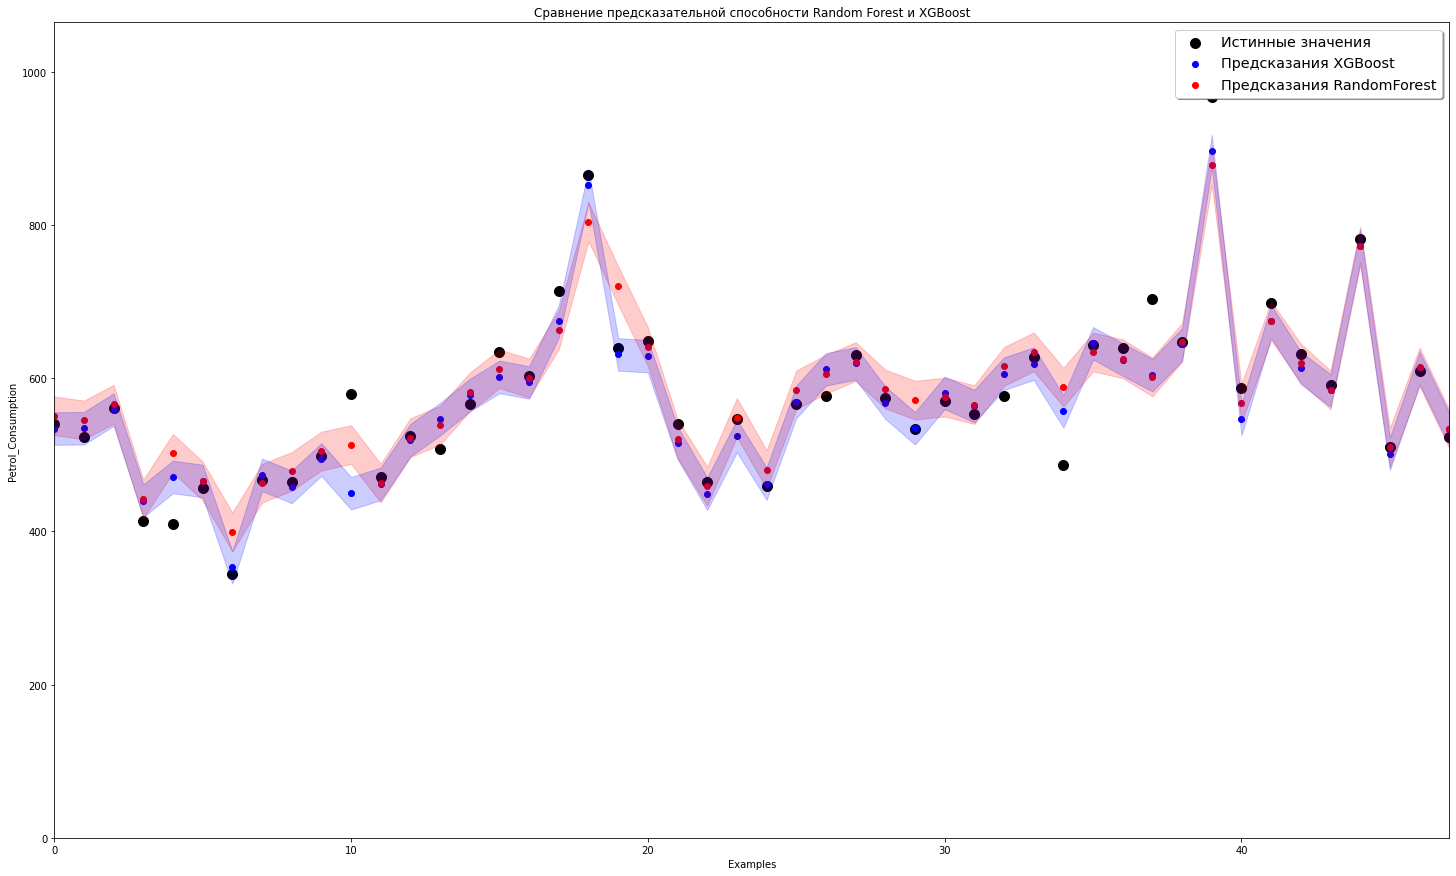

In [ ]:
#@title Сравнение предсказательной способности Random Forest и XGBoost

fig = plt.figure(figsize=[25,15])
ax = fig.add_subplot(111)

X_grid = np.arange(0, y.size, 1)
# X_grid = X_grid.reshape((len(X_grid), 1))

ax.set( xlim = [X_grid.min(), X_grid.max()],
       ylim = [0,max(*y)*1.1],
       title = 'Сравнение предсказательной способности Random Forest и XGBoost',
       xlabel = 'Examples',
       ylabel = 'Petrol_Consumption')

rf_pred = regressor.predict(X)
xgb_pred=xg_reg.predict(X)

plt.scatter(X_grid, y,color='black',label='Истинные значения',s=100);
plt.scatter(X_grid, xgb_pred, color="blue",label='Предсказания XGBoost');
plt.scatter(X_grid, rf_pred, color="red",label='Предсказания RandomForest');

rf_mstd=metrics.mean_absolute_error(y,  rf_pred)
xgb_mstd=metrics.mean_absolute_error(y,  xgb_pred)

ax.fill_between(X_grid, rf_pred -  rf_mstd, rf_pred + rf_mstd, color="red", alpha=0.2);
ax.fill_between(X_grid, xgb_pred -  xgb_mstd, xgb_pred +  xgb_mstd, color="blue", alpha=0.2);

# ax = fig.add_subplot(111)
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

На самом деле, точность XGBoost повышается с ростом количества дереевьев n_estimators, поэтому модель может начать проигрывать при уменьшении этого гиперпараметра. Чем больше n_estimators вы используете, тем точнее становится модель из-за природы алгоритма повышения градиента

При обучении первого классификатора определен параметр '`global_n_estimators`', который определяет количество задействованных деревьев в моделях в пределах данного программного модуля. Поэксперементируйте с ним.
*(Перевыполнить блокнот - "**Среда выполнения**"->"**Выполнить всё**")*

# **Источники:**



1. https://pandas.pydata.org/docs/
2. https://plotly.com/python-api-reference/
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest
5. https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
6. https://numpy.org/doc/stable/
7. https://github.com/ShauryaBhandari/Machine-Learning/blob/master/Random%20Forest/bill_authentication.csv
8. https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
9. https://xgboost.readthedocs.io/en/stable/python/python_api.html
10. https://www.datacamp.com/community/tutorials/xgboost-in-python
11. https://www.quora.com/How-do-we-decide-between-XGBoost-RandomForest-and-Decision-Tree
12. https://medium.com/nuances-of-programming/алгоритм-xgboost-пусть-он-царствует-долго-dc8c4eca3fbc
13. https://github.com/szilard/benchm-ml

